!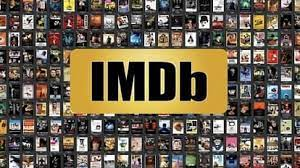

# **Introduction**
Hey you! My fellow data enthusiasts, I am here to present to you IMDB Data Analysis.
So, let's get started....

# **Getting Started**
> **About this Dataset**:

IMDb is an online database of information related to films, television series, podcasts, home videos, video games, and streaming content online – including cast, production crew and personal biographies, plot summaries, trivia, ratings, and fan and critical reviews. It is the world's most popular and authoritative source for movie, TV and celebrity content.

**Content**
Data:-
**Poster_Link** - Link of the poster that imdb using

**Series_Title** = Name of the movie

**Released_Year** - Year at which that movie released

**Certificate** - Certificate earned by that movie

**Runtime** - Total runtime of the movie

**Genre** - Genre of the movie

**IMDB_Rating** - Rating of the movie at IMDB site

**Overview** - mini story/ summary

**Meta_score** - Score earned by the movie

**Director** - Name of the Director

**Star1,Star2,Star3,Star4** - Name of the Stars

**No_of_votes** - Total number of votes

**Gross** - Money earned by that movie


> **Installing and importing dependencies**

We will be using the following libraries:

**Pandas**: It is a Python library used for working with data sets. It has functions for analyzing, cleaning, exploring, and manipulating data.

**Numpy**: It is a Python library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices.

**Matplotlib**: It is a cross-platform, data visualization and graphical plotting library (histograms, scatter plots, bar charts, etc) for Python.

**Seaborn**: It is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

**Wordcloud**: A visualization technique to represent the frequency of words in a text where the size of the word represents its frequency

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS

# **Data Preparation and Cleaning**

In [2]:
imdb_data=pd.read_csv(r"C:\Users\ishan\Data Anaytics\IMDB Movies\imdb_top_1000.csv") #Now we are reading the dataset vgsales.csv using read_csv function
imdb_data.head(5) #this function is used to return the topmost data in the dataset 

Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   

                                            Overview  Meta_score  \
0  Two imprisoned men bond over a number of years...        80.0   
1  An organized crime dynasty's aging patriarch t...       100.0   
2  When the menace known as the Joker wreaks havo...        84.0   
3  The early life and career of Vito Corleone in ...        90.0   
4  A jury holdout attempts to prevent a miscarria...        96.0   

               Director           Star1           Star2          Star3  \
0        Frank Darabont     Tim Robbins  Morgan Freeman     Bob Gunton   
1  Francis Ford Coppola   Marlon Brando       Al Pacino     James Caan   
2     Christopher Nolan  Christian Bale    Heath Ledger  Aaron Eckhart   
3  Francis Ford Coppola       Al Pacino  Robert De Niro  Robert Duvall   
4          Sidney Lumet     Henry Fonda     Lee J. Cobb  Martin Balsam   

            Star4  No_of_Votes        Gross  
0  William Sadler      2343110   28,341,469  
1    Diane Keaton      1620367  134,966,411  
2   Michael Caine      2303232  534,858,444  
3    Diane Keaton      1129952   57,300,000  
4    John Fiedler       689845    4,360,000

**As we don't need Poster_Link and Overview columns let's drop them**

In [3]:
imdb_data.drop(['Poster_Link', 'Overview'],axis=1,inplace=True) 

In [4]:
print("The shape of the dataset is: {} rows and {} columns".format(imdb_data.shape[0], imdb_data.shape[1]))

The shape of the dataset is: 1000 rows and 14 columns


In [5]:
imdb_data.info()   #This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Certificate    899 non-null    object 
 3   Runtime        1000 non-null   object 
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Meta_score     843 non-null    float64
 7   Director       1000 non-null   object 
 8   Star1          1000 non-null   object 
 9   Star2          1000 non-null   object 
 10  Star3          1000 non-null   object 
 11  Star4          1000 non-null   object 
 12  No_of_Votes    1000 non-null   int64  
 13  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(11)
memory usage: 109.5+ KB


**Let's find the no.of null values in each column**

In [6]:
imdb_data.isnull().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

**Treating null values in Certificate column using mode**

In [7]:
imdb_data['Certificate'].mode()

0    U
Name: Certificate, dtype: object

In [8]:
imdb_data['Certificate'].fillna('U',inplace=True)

**To change the datatype of Gross column we first need to remove the ',' so that it is easier to change the dtype to float without any errors and then replacing null values with zero**

In [9]:
print(imdb_data['Gross'].head(1))
imdb_data['Gross'] = imdb_data['Gross'].str.replace(',', '')
print(imdb_data['Gross'].head(1))

imdb_data['Gross'] = imdb_data['Gross'].astype('float64')
imdb_data['Gross'] = imdb_data['Gross'].replace(np.nan, 0)

0    28,341,469
Name: Gross, dtype: object
0    28341469
Name: Gross, dtype: object


In [10]:
imdb_data['Gross'] = imdb_data['Gross'].astype(int)

**Now let's treat the null values in Meta_score column**

In [11]:
imdb_data['Meta_score'].value_counts()

76.0    32
84.0    29
90.0    29
80.0    27
73.0    27
        ..
28.0     1
36.0     1
46.0     1
30.0     1
41.0     1
Name: Meta_score, Length: 63, dtype: int64

In [12]:
imdb_Nu=imdb_data[[ 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']]   #columns with numeric values
imdb_Ob=imdb_data.drop(columns=['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross'])  # columns with string values
imdb_Nu

IMDB_Rating  Meta_score  No_of_Votes      Gross
0            9.3        80.0      2343110   28341469
1            9.2       100.0      1620367  134966411
2            9.0        84.0      2303232  534858444
3            9.0        90.0      1129952   57300000
4            9.0        96.0       689845    4360000
..           ...         ...          ...        ...
995          7.6        76.0       166544          0
996          7.6        84.0        34075          0
997          7.6        85.0        43374   30500000
998          7.6        78.0        26471          0
999          7.6        93.0        51853          0

[1000 rows x 4 columns]

**We are going to use KNNImputer;**

**The KNNImputer is used to fill in missing values in a dataset using the k-Nearest Neighbors method. k-Nearest Neighbors algorithm is used for classification and prediction problems. The KNNImputer predicts the value of a missing value by observing trends in related columns.**

In [13]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
imputed = imputer.fit_transform(imdb_Nu)
#This method simultaneously performs fit and transform operations on the input data and converts the data points. It will calculate the mean(μ)and standard deviation(σ) of the feature F at a time it will transform the data points of the feature F.
imdb_data_imputed = pd.DataFrame(imputed, columns=imdb_Nu.columns)
imdb_data_imputed

IMDB_Rating  Meta_score  No_of_Votes        Gross
0            9.3        80.0    2343110.0   28341469.0
1            9.2       100.0    1620367.0  134966411.0
2            9.0        84.0    2303232.0  534858444.0
3            9.0        90.0    1129952.0   57300000.0
4            9.0        96.0     689845.0    4360000.0
..           ...         ...          ...          ...
995          7.6        76.0     166544.0          0.0
996          7.6        84.0      34075.0          0.0
997          7.6        85.0      43374.0   30500000.0
998          7.6        78.0      26471.0          0.0
999          7.6        93.0      51853.0          0.0

[1000 rows x 4 columns]

In [14]:
result = pd.concat([imdb_Ob, imdb_data_imputed], axis=1)
result

Series_Title Released_Year Certificate  Runtime  \
0    The Shawshank Redemption          1994           A  142 min   
1               The Godfather          1972           A  175 min   
2             The Dark Knight          2008          UA  152 min   
3      The Godfather: Part II          1974           A  202 min   
4                12 Angry Men          1957           U   96 min   
..                        ...           ...         ...      ...   
995    Breakfast at Tiffany's          1961           A  115 min   
996                     Giant          1956           G  201 min   
997     From Here to Eternity          1953      Passed  118 min   
998                  Lifeboat          1944           U   97 min   
999              The 39 Steps          1935           U   86 min   

                        Genre              Director              Star1  \
0                       Drama        Frank Darabont        Tim Robbins   
1                Crime, Drama  Francis Ford Coppola      Marlon Brando   
2        Action, Crime, Drama     Christopher Nolan     Christian Bale   
3                Crime, Drama  Francis Ford Coppola          Al Pacino   
4                Crime, Drama          Sidney Lumet        Henry Fonda   
..                        ...                   ...                ...   
995    Comedy, Drama, Romance         Blake Edwards     Audrey Hepburn   
996            Drama, Western        George Stevens   Elizabeth Taylor   
997       Drama, Romance, War        Fred Zinnemann     Burt Lancaster   
998                Drama, War      Alfred Hitchcock  Tallulah Bankhead   
999  Crime, Mystery, Thriller      Alfred Hitchcock       Robert Donat   

                 Star2           Star3           Star4  IMDB_Rating  \
0       Morgan Freeman      Bob Gunton  William Sadler          9.3   
1            Al Pacino      James Caan    Diane Keaton          9.2   
2         Heath Ledger   Aaron Eckhart   Michael Caine          9.0   
3       Robert De Niro   Robert Duvall    Diane Keaton          9.0   
4          Lee J. Cobb   Martin Balsam    John Fiedler          9.0   
..                 ...             ...             ...          ...   
995     George Peppard   Patricia Neal     Buddy Ebsen          7.6   
996        Rock Hudson      James Dean   Carroll Baker          7.6   
997   Montgomery Clift    Deborah Kerr      Donna Reed          7.6   
998        John Hodiak   Walter Slezak  William Bendix          7.6   
999  Madeleine Carroll  Lucie Mannheim  Godfrey Tearle          7.6   

     Meta_score  No_of_Votes        Gross  
0          80.0    2343110.0   28341469.0  
1         100.0    1620367.0  134966411.0  
2          84.0    2303232.0  534858444.0  
3          90.0    1129952.0   57300000.0  
4          96.0     689845.0    4360000.0  
..          ...          ...          ...  
995        76.0     166544.0          0.0  
996        84.0      34075.0          0.0  
997        85.0      43374.0   30500000.0  
998        78.0      26471.0          0.0  
999        93.0      51853.0          0.0  

[1000 rows x 14 columns]

**This is our final Dataframe**

In [15]:
#Missing data 
features_stat =result.isna().sum().rename('num_of_missing').reset_index()
features_stat.columns = ['feature', 'num_of_missing']
features_stat['percentage_of_missings'] = features_stat['num_of_missing'].apply(lambda x:x/len(result))
features_stat.sort_values(by='percentage_of_missings',ascending=False)

feature  num_of_missing  percentage_of_missings
0    Series_Title               0                     0.0
1   Released_Year               0                     0.0
2     Certificate               0                     0.0
3         Runtime               0                     0.0
4           Genre               0                     0.0
5        Director               0                     0.0
6           Star1               0                     0.0
7           Star2               0                     0.0
8           Star3               0                     0.0
9           Star4               0                     0.0
10    IMDB_Rating               0                     0.0
11     Meta_score               0                     0.0
12    No_of_Votes               0                     0.0
13          Gross               0                     0.0

In [16]:
result.isnull().sum()

Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
IMDB_Rating      0
Meta_score       0
No_of_Votes      0
Gross            0
dtype: int64

**Now since we have treated the null values, Let's change the dtype of Runtime from object to int to make the values more easier to understand**

In [17]:
result["Runtime"] = result["Runtime"].str.extract('([^\s]+)')   #extracting numbers before whitespace
result["Runtime"] = result["Runtime"].astype(int)   #changing the dtype of extracted numbers to int

In [18]:
result['Released_Year'].value_counts()

2014    32
2004    31
2009    29
2013    28
2016    28
        ..
1926     1
1936     1
1924     1
1921     1
PG       1
Name: Released_Year, Length: 100, dtype: int64

In [19]:
#drop row contain 'PG' to convert the column to int datatype
result = result.drop(labels=966, axis=0)

In [20]:
result['Released_Year']=result['Released_Year'].astype(int)

# **Exploratory Data Analysis and Visualization**

**Since I like dark background alot, I used plt.style.use("dark_background") to change all of them to Dark backgrounds :P**

In [21]:
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

In [22]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    int32  
 2   Certificate    999 non-null    object 
 3   Runtime        999 non-null    int32  
 4   Genre          999 non-null    object 
 5   Director       999 non-null    object 
 6   Star1          999 non-null    object 
 7   Star2          999 non-null    object 
 8   Star3          999 non-null    object 
 9   Star4          999 non-null    object 
 10  IMDB_Rating    999 non-null    float64
 11  Meta_score     999 non-null    float64
 12  No_of_Votes    999 non-null    float64
 13  Gross          999 non-null    float64
dtypes: float64(4), int32(2), object(8)
memory usage: 109.3+ KB


In [23]:
result.describe()

Released_Year     Runtime  IMDB_Rating  Meta_score   No_of_Votes  \
count     999.000000  999.000000   999.000000  999.000000  9.990000e+02   
mean     1991.217217  122.873874     7.949650   78.260928  2.736974e+05   
std        23.297025   28.102520     0.275407   11.684869  3.275366e+05   
min      1920.000000   45.000000     7.600000   28.000000  2.508800e+04   
25%      1976.000000  103.000000     7.700000   72.000000  5.547150e+04   
50%      1999.000000  119.000000     7.900000   79.000000  1.383560e+05   
75%      2009.000000  137.000000     8.100000   86.000000  3.744775e+05   
max      2020.000000  321.000000     9.300000  100.000000  2.343110e+06   

              Gross  
count  9.990000e+02  
mean   5.641946e+07  
std    1.032231e+08  
min    0.000000e+00  
25%    4.422285e+05  
50%    1.068028e+07  
75%    6.139004e+07  
max    9.366622e+08

In [24]:
result.corr()

C:\Users\ishan\AppData\Local\Temp\ipykernel_9408\76870456.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  result.corr()


Released_Year   Runtime  IMDB_Rating  Meta_score  No_of_Votes  \
Released_Year       1.000000  0.165807    -0.131053   -0.284450     0.241785   
Runtime             0.165807  1.000000     0.244112   -0.017840     0.173304   
IMDB_Rating        -0.131053  0.244112     1.000000    0.255639     0.495361   
Meta_score         -0.284450 -0.017840     0.255639    1.000000    -0.033619   
No_of_Votes         0.241785  0.173304     0.495361   -0.033619     1.000000   
Gross               0.250435  0.143354     0.083947   -0.064244     0.602533   

                  Gross  
Released_Year  0.250435  
Runtime        0.143354  
IMDB_Rating    0.083947  
Meta_score    -0.064244  
No_of_Votes    0.602533  
Gross          1.000000

C:\Users\ishan\AppData\Local\Temp\ipykernel_9408\3661690383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(result.corr()) #a graphical tool that displays the correlation between multiple variables as a color-coded matrix. It's like a color chart. that shows us how closely related different variables are.


<Axes: >

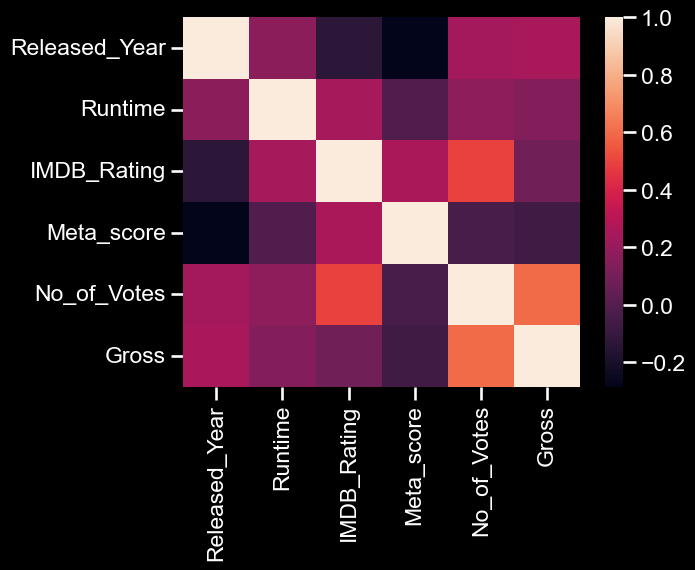

In [25]:
sns.heatmap(result.corr()) #a graphical tool that displays the correlation between multiple variables as a color-coded matrix. It's like a color chart. that shows us how closely related different variables are.

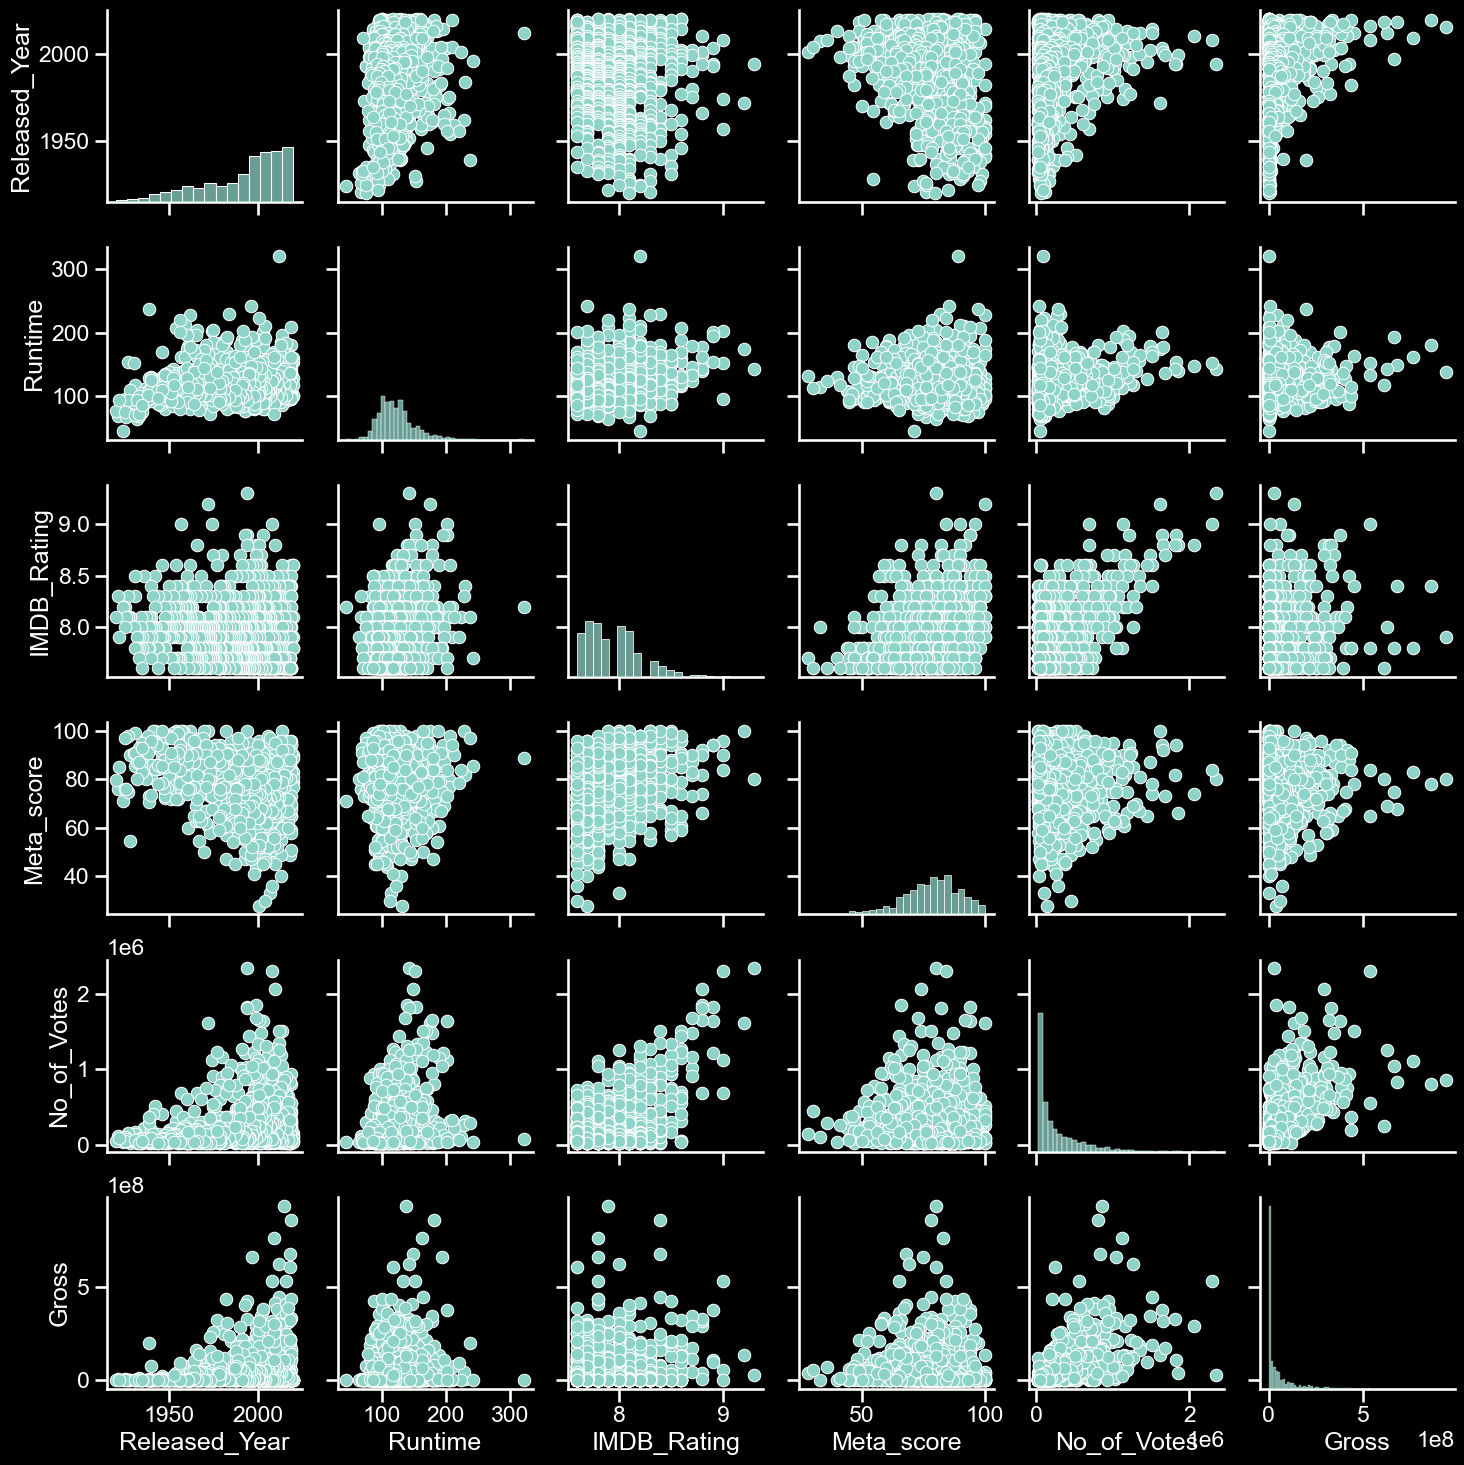

In [26]:
sns.pairplot(result) #THIS SHOWS THE RELATIONSHIP BETWEEN EACH COLUMN

# **Five Highest Rated Movies**

In [27]:
result.head()

Series_Title  Released_Year Certificate  Runtime  \
0  The Shawshank Redemption           1994           A      142   
1             The Godfather           1972           A      175   
2           The Dark Knight           2008          UA      152   
3    The Godfather: Part II           1974           A      202   
4              12 Angry Men           1957           U       96   

                  Genre              Director           Star1           Star2  \
0                 Drama        Frank Darabont     Tim Robbins  Morgan Freeman   
1          Crime, Drama  Francis Ford Coppola   Marlon Brando       Al Pacino   
2  Action, Crime, Drama     Christopher Nolan  Christian Bale    Heath Ledger   
3          Crime, Drama  Francis Ford Coppola       Al Pacino  Robert De Niro   
4          Crime, Drama          Sidney Lumet     Henry Fonda     Lee J. Cobb   

           Star3           Star4  IMDB_Rating  Meta_score  No_of_Votes  \
0     Bob Gunton  William Sadler          9.3        80.0    2343110.0   
1     James Caan    Diane Keaton          9.2       100.0    1620367.0   
2  Aaron Eckhart   Michael Caine          9.0        84.0    2303232.0   
3  Robert Duvall    Diane Keaton          9.0        90.0    1129952.0   
4  Martin Balsam    John Fiedler          9.0        96.0     689845.0   

         Gross  
0   28341469.0  
1  134966411.0  
2  534858444.0  
3   57300000.0  
4    4360000.0

# **Most Popular Genre**

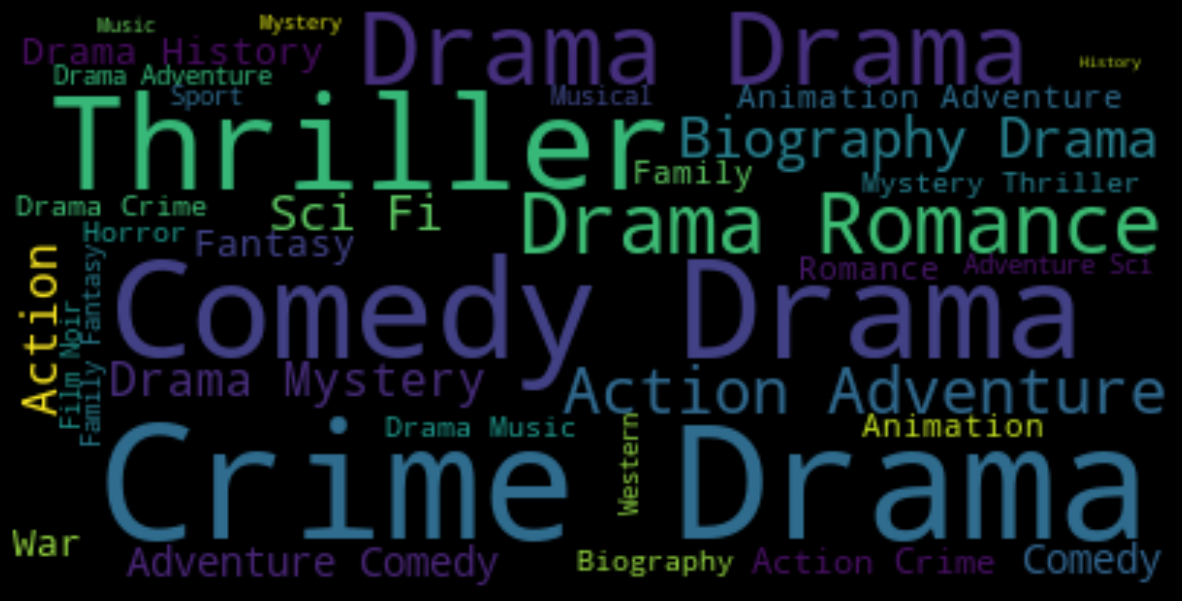

In [28]:
text = " ".join(i for i in result.Genre)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# **Distribution of each numeric column**

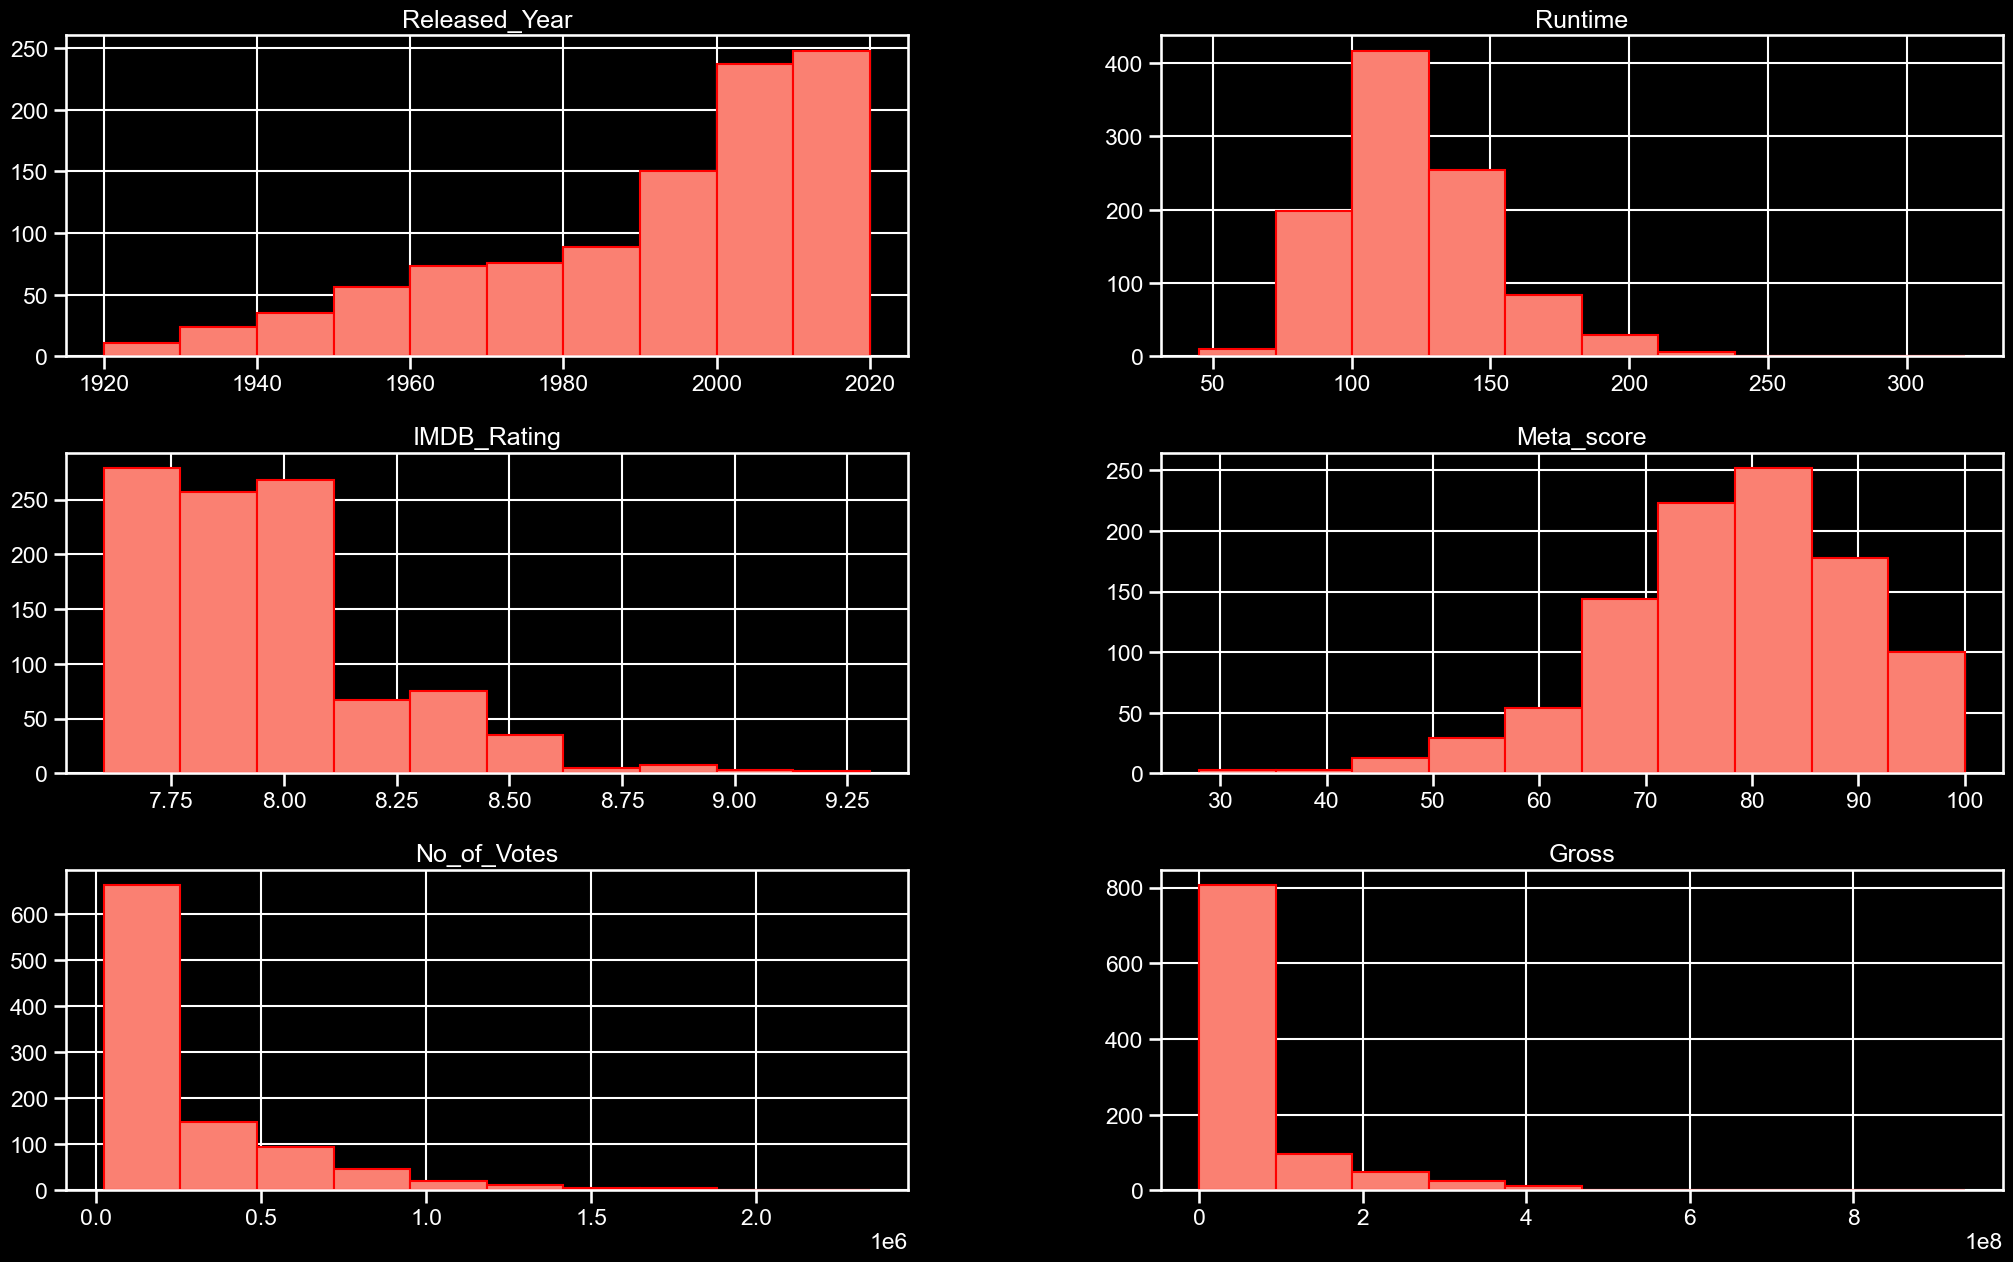

In [29]:
numerical_attributes = ['Released_Year','Runtime','IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']
result[numerical_attributes].hist(figsize = (25, 15), color = 'salmon', edgecolor = 'red');

# **Top 5 Grossing movies**

In [30]:
result.sort_values(by='Gross',ascending=False).head(5)

Series_Title  Released_Year Certificate  \
477  Star Wars: Episode VII - The Force Awakens           2015           U   
59                            Avengers: Endgame           2019          UA   
623                                      Avatar           2009          UA   
60                       Avengers: Infinity War           2018          UA   
652                                     Titanic           1997          UA   

     Runtime                       Genre       Director              Star1  \
477      138   Action, Adventure, Sci-Fi    J.J. Abrams       Daisy Ridley   
59       181    Action, Adventure, Drama  Anthony Russo          Joe Russo   
623      162  Action, Adventure, Fantasy  James Cameron    Sam Worthington   
60       149   Action, Adventure, Sci-Fi  Anthony Russo          Joe Russo   
652      194              Drama, Romance  James Cameron  Leonardo DiCaprio   

                 Star2             Star3               Star4  IMDB_Rating  \
477        John Boyega       Oscar Isaac    Domhnall Gleeson          7.9   
59   Robert Downey Jr.       Chris Evans        Mark Ruffalo          8.4   
623        Zoe Saldana  Sigourney Weaver  Michelle Rodriguez          7.8   
60   Robert Downey Jr.   Chris Hemsworth        Mark Ruffalo          8.4   
652       Kate Winslet        Billy Zane         Kathy Bates          7.8   

     Meta_score  No_of_Votes        Gross  
477        80.0     860823.0  936662225.0  
59         78.0     809955.0  858373000.0  
623        83.0    1118998.0  760507625.0  
60         68.0     834477.0  678815482.0  
652        75.0    1046089.0  659325379.0

# **Released_Year vs. IMDB_Rating**

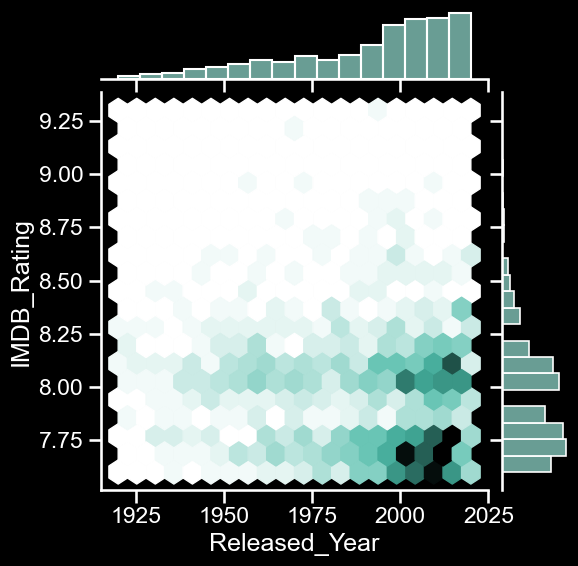

In [31]:
sns.jointplot(data=result, x='Released_Year', y='IMDB_Rating', kind="hex")

# **IMDB Rating Yearly trend**

In [32]:
ratings_data=result[['Released_Year','IMDB_Rating']]
ratings_data=ratings_data.groupby(by='Released_Year').agg(np.mean)
ratings_data

IMDB_Rating
Released_Year             
1920              8.100000
1921              8.300000
1922              7.900000
1924              8.200000
1925              8.100000
...                    ...
2016              7.935714
2017              7.890909
2018              7.994737
2019              7.995652
2020              8.133333

[99 rows x 1 columns]

<Axes: xlabel='Released_Year', ylabel='IMDB_Rating'>

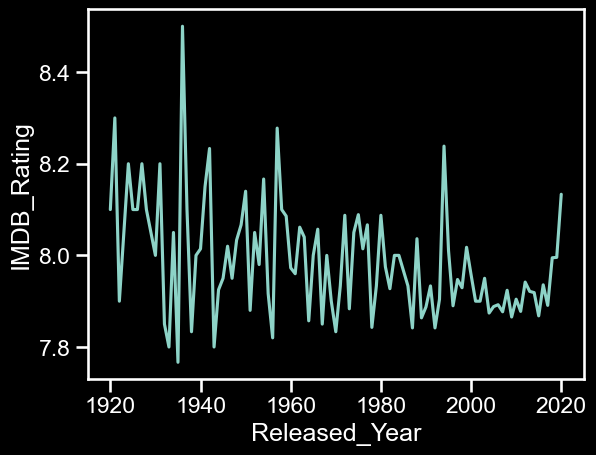

In [33]:
sns.lineplot(data=ratings_data,x= ratings_data.index , y = 'IMDB_Rating')

# **IMDB Rating vs. Runtime**

In [34]:
runtime_data=result[['Runtime','IMDB_Rating']]
runtime_data=runtime_data.groupby(by='Runtime').agg(np.mean)
runtime_data

IMDB_Rating
Runtime             
45               8.2
64               7.9
67               8.1
68               8.3
69               7.8
...              ...
228              8.3
229              8.4
238              8.1
242              7.7
321              8.2

[140 rows x 1 columns]

C:\Users\ishan\anaconda3\lib\site-packages\seaborn\utils.py:122: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scout = method(scout_x, scout_y, **kws)
C:\Users\ishan\anaconda3\lib\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


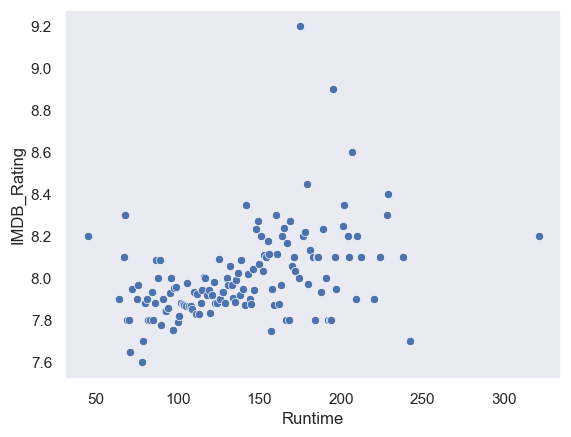

In [35]:
sns.set(style='dark',)
res=sns.scatterplot(data=runtime_data,x= runtime_data.index , y = 'IMDB_Rating' , cmap="Blues")
plt.show()

# **Count of each rating**

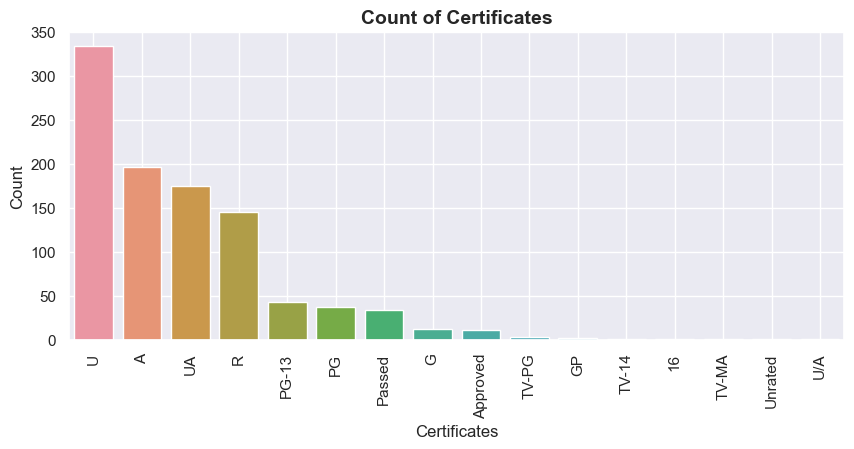

In [36]:
plt.figure(figsize=(10,4))
sns.countplot(x="Certificate", data=result, order = result['Certificate'].value_counts().index)   #here we are using seaborn as sns which is an in-nuilt library in python that uses mtplotlib underneath to plot graphs.
plt.xticks(rotation='vertical')
plt.title('Count of Certificates',fontsize=14, fontweight ="bold")    #labelling the data
plt.ylabel('Count',fontsize=12)                 #labelling the y-label
plt.xlabel('Certificates',fontsize=12) #labelling the x-label
plt.grid()
plt.show()

# **Top 5 Directors with highest no. of contents**

In [37]:
result['Director'].value_counts().head(5)

Alfred Hitchcock    14
Steven Spielberg    13
Hayao Miyazaki      11
Martin Scorsese     10
Akira Kurosawa      10
Name: Director, dtype: int64

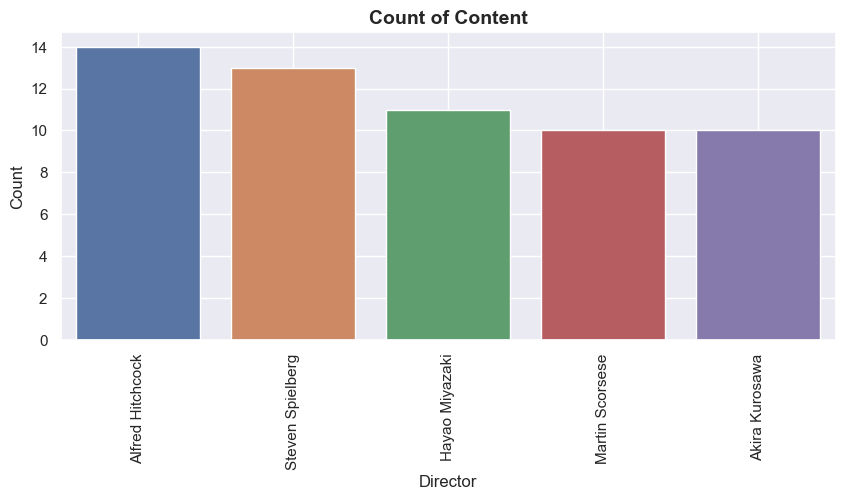

In [38]:
plt.figure(figsize=(10,4))
sns.countplot(x='Director', data=result, order = result['Director'].value_counts().head(5).index)   #here we are using seaborn as sns which is an in-nuilt library in python that uses mtplotlib underneath to plot graphs.
plt.xticks(rotation='vertical')
plt.title('Count of Content',fontsize=14, fontweight ="bold")    #labelling the data
plt.ylabel('Count',fontsize=12)                 #labelling the y-label
plt.xlabel('Director',fontsize=12) #labelling the x-label
plt.grid()
plt.show()

# **Gross vs. IMDB Rating**

In [39]:
px.scatter(result,x= 'IMDB_Rating' , y = 'Gross', title='Gross vs. IMDB Rating', size="No_of_Votes" ,template= "plotly_dark")

# **Average IMDB Rating of these Directors**

In [40]:
df2=result[['Director','IMDB_Rating']]
a=df2[df2['Director'].isin(['Alfred Hitchcock','Steven Spielberg','Hayao Miyazaki','Martin Scorsese','Akira Kurosawa'])]
a=a.groupby(by='Director')['IMDB_Rating'].max()
a = pd.DataFrame({'Director':a.index, 'IMDB_Rating':a.values})
a

Director  IMDB_Rating
0    Akira Kurosawa          8.6
1  Alfred Hitchcock          8.5
2    Hayao Miyazaki          8.6
3   Martin Scorsese          8.7
4  Steven Spielberg          8.9

In [41]:
fig = px.bar(a, x="Director", y='IMDB_Rating', title='5 Directors Average IMDB Rating that have most content')
fig.show()

# **Most popular Director**

In [42]:
data=result[result['Director']=='Steven Spielberg']
data=data.sort_values(by='Released_Year')
data

Series_Title  Released_Year Certificate  Runtime  \
415                                Jaws           1975           A      124   
988  Close Encounters of the Third Kind           1977           U      138   
72              Raiders of the Lost Ark           1981           A      115   
688          E.T. the Extra-Terrestrial           1982           U      115   
682                    The Color Purple           1985           U      154   
832                   Empire of the Sun           1987           U      153   
168  Indiana Jones and the Last Crusade           1989           U      127   
7                      Schindler's List           1993           A      195   
262                       Jurassic Park           1993          UA      127   
24                  Saving Private Ryan           1998           R      169   
243                 Catch Me If You Can           2002           A      141   
951                     Minority Report           2002           A      145   
890                     Bridge of Spies           2015          UA      142   

                         Genre          Director              Star1  \
415        Adventure, Thriller  Steven Spielberg       Roy Scheider   
988              Drama, Sci-Fi  Steven Spielberg   Richard Dreyfuss   
72           Action, Adventure  Steven Spielberg      Harrison Ford   
688             Family, Sci-Fi  Steven Spielberg       Henry Thomas   
682                      Drama  Steven Spielberg       Danny Glover   
832     Action, Drama, History  Steven Spielberg     Christian Bale   
168          Action, Adventure  Steven Spielberg      Harrison Ford   
7    Biography, Drama, History  Steven Spielberg        Liam Neeson   
262  Action, Adventure, Sci-Fi  Steven Spielberg          Sam Neill   
24                  Drama, War  Steven Spielberg          Tom Hanks   
243    Biography, Crime, Drama  Steven Spielberg  Leonardo DiCaprio   
951     Action, Crime, Mystery  Steven Spielberg         Tom Cruise   
890   Drama, History, Thriller  Steven Spielberg          Tom Hanks   

                 Star2               Star3                 Star4  IMDB_Rating  \
415        Robert Shaw    Richard Dreyfuss         Lorraine Gary          8.0   
988  François Truffaut           Teri Garr        Melinda Dillon          7.6   
72         Karen Allen        Paul Freeman      John Rhys-Davies          8.4   
688     Drew Barrymore        Peter Coyote           Dee Wallace          7.8   
682    Whoopi Goldberg       Oprah Winfrey        Margaret Avery          7.8   
832     John Malkovich  Miranda Richardson          Nigel Havers          7.7   
168       Sean Connery        Alison Doody       Denholm Elliott          8.2   
7        Ralph Fiennes        Ben Kingsley      Caroline Goodall          8.9   
262         Laura Dern       Jeff Goldblum  Richard Attenborough          8.1   
24          Matt Damon        Tom Sizemore          Edward Burns          8.6   
243          Tom Hanks  Christopher Walken          Martin Sheen          8.1   
951      Colin Farrell     Samantha Morton         Max von Sydow          7.6   
890       Mark Rylance           Alan Alda              Amy Ryan          7.6   

     Meta_score  No_of_Votes        Gross  
415        87.0     543388.0  260000000.0  
988        90.0     184966.0  132088635.0  
72         85.0     884112.0  248159971.0  
688        91.0     372490.0  435110554.0  
682        78.0      78321.0   98467863.0  
832        62.0     115677.0   22238696.0  
168        65.0     692366.0  197171806.0  
7          94.0    1213505.0   96898818.0  
262        68.0     867615.0  402453882.0  
24         91.0    1235804.0  216540909.0  
243        75.0     832846.0  164615351.0  
951        80.0     508417.0  132072926.0  
890        81.0     287659.0   72313754.0

# **IMDB Rating Yearly Trend**

In [43]:
px.line(data,x= 'Released_Year' , y = 'IMDB_Rating', title='Released Year vs. IMDB Rating', template= "plotly_dark")

# **Gross yearly trend**

In [44]:
px.line(data,x= 'Released_Year' , y = 'Gross', title='Released Year vs. Gross', template= "plotly_dark")

**What was the Genre Steven majorly worked on?**

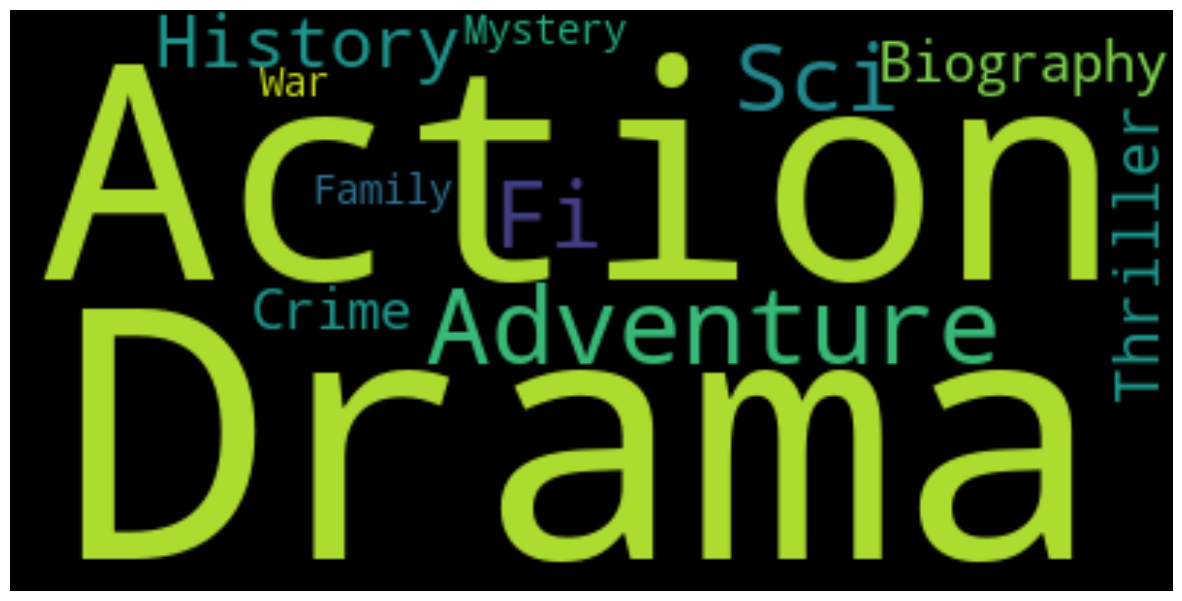

In [45]:
text = " ".join(i for i in data.Genre)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# **Who are the top 10 Directors with highest average IMDB Rating?**

In [46]:
ratings_data=result[['Director','IMDB_Rating']]
ratings_data=ratings_data.groupby(by='Director').agg(np.mean)
ratings_data.sort_values(by='IMDB_Rating',ascending=False,inplace=True)


In [47]:
ratings_data=ratings_data.head(10)
ratings_data

IMDB_Rating
Director                       
Frank Darabont             8.95
Irvin Kershner             8.70
Lana Wachowski             8.70
George Lucas               8.60
Roberto Benigni            8.60
Masaki Kobayashi           8.60
Thomas Kail                8.60
Sudha Kongara              8.60
Fernando Meirelles         8.60
Roger Allers               8.50

In [48]:
fig = px.bar(data_frame=ratings_data, x=ratings_data.index, y='IMDB_Rating', template= "plotly_dark")
fig.show()

# **Director with highest Average IMDB Rating**

In [49]:
data1=result[result['Director']=='Frank Darabont']
data1=data1.sort_values(by='Released_Year')
data1

Series_Title  Released_Year Certificate  Runtime  \
0   The Shawshank Redemption           1994           A      142   
25            The Green Mile           1999           A      189   

                    Genre        Director        Star1                  Star2  \
0                   Drama  Frank Darabont  Tim Robbins         Morgan Freeman   
25  Crime, Drama, Fantasy  Frank Darabont    Tom Hanks  Michael Clarke Duncan   

          Star3           Star4  IMDB_Rating  Meta_score  No_of_Votes  \
0    Bob Gunton  William Sadler          9.3        80.0    2343110.0   
25  David Morse     Bonnie Hunt          8.6        61.0    1147794.0   

          Gross  
0    28341469.0  
25  136801374.0

# **Frank Darabont movies' IMDB Rating Yearly Trend**

In [50]:
px.line(data1,x= 'Released_Year' , y = 'IMDB_Rating', title='Released Year vs. IMDB Rating', template= "plotly_dark")

# **Gross yearly trend line**

In [51]:
px.line(data1,x= 'Released_Year' , y = 'Gross', title='Released Year vs. Gross', template= "plotly_dark")

# **Let's make an interactive graph using plotly and look deeper in the Certificate distribution of Movies.**

In [52]:
fig = px.scatter(result, x="Released_Year", y="IMDB_Rating", color="Certificate", size="Gross",hover_name="Series_Title", hover_data=['Runtime','Genre','Director','Meta_score'])
fig.show()

**Since the Size of the bubbles is determined by the Gross value therefore there might be some dots which are not visible but it shows the information as they have 0 Gross value and TV-14,16,TV-MA Certificates have in total zero grosiing value therefore the are not plotted.**

In [53]:
result.groupby(by="Certificate")["Gross"].mean().sort_values()

Certificate
16          0.000000e+00
TV-14       0.000000e+00
TV-MA       0.000000e+00
TV-PG       3.555400e+04
Unrated     3.000000e+05
GP          7.089580e+05
Passed      3.676992e+06
Approved    3.790371e+06
PG          1.160320e+07
R           2.385025e+07
U/A         2.602096e+07
PG-13       3.351085e+07
G           4.133027e+07
U           5.222642e+07
A           5.837403e+07
UA          1.221531e+08
Name: Gross, dtype: float64

# **Conclusion**

> * **There is positive relation between No. of Votes and IMDB Rating and also No. of Votes and Gross values**
> * **Among the top 1000 movies, many of the movies were from 2000-2020**
> * **Most common runtime is around 100-150 mins**
> * **Most common IMDB Rating is 7.5-8**
> * **Five Highest Rated movies are:**
> 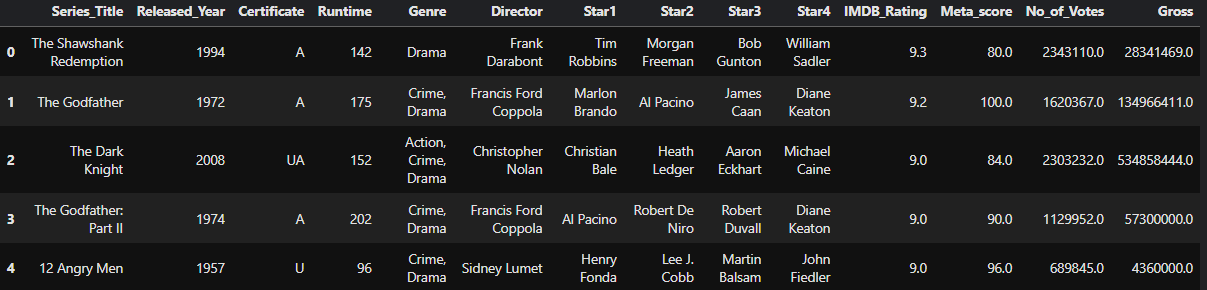
> * **Comedy Drama and Crime Drama are the most popular Genres**
> * **Top 5 Grossing Movies are:**
> 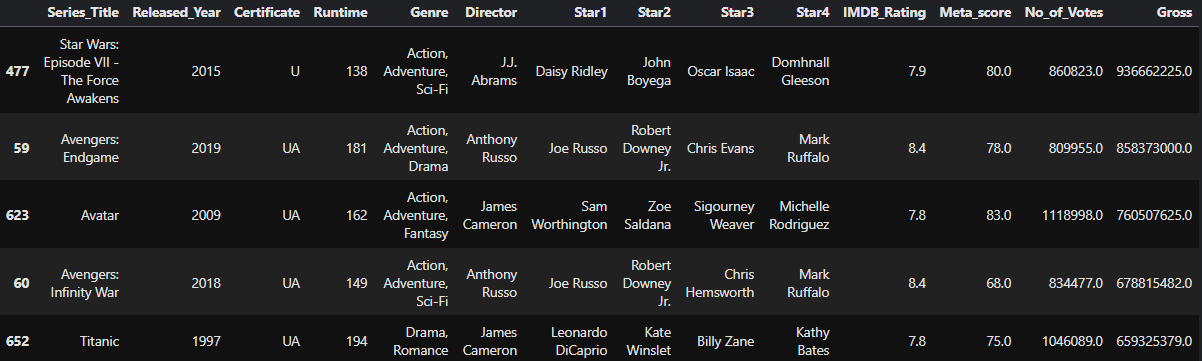
> * **Even though most of the movies are from 2000-2020, the IMDB Rating of all of the movies were from 7.8-8.2, this canbe because many people watch latest movies hence get alot of votes and this is not th case with older movies, maybe this can be misleading sometimes.**
> * **Movies with U certrificate are most common, followed by A, UA, R**
> 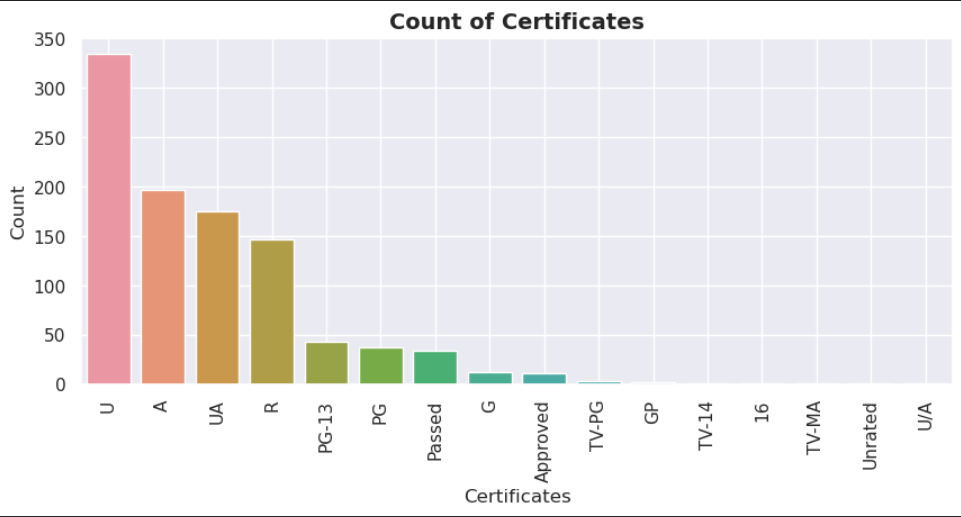
> * **Alfred Hitchcock had the most no. of movies listed in the top 1000s followed by Steven Spielberg and Hayao Miyazaki**
> * **Among them Steven Spielberg had the highest average IMDB Rating for more analysis on his project you can see above**
> * **The most popular director was Frank Darabont with 8.95 Average IMDB Rating followed by Irvin Kershner and Lana Wachowski for more analysis on Frank Darabont's projects yoy can see above**
 


# **Reference**
https://www.kaggle.com/code/harshitshankhdhar/eda-on-imdb-movies-dataset

**If you like the notebook I've prepared, an upvote would be really apreciated :D**